In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
from pathlib import Path

workding_dir = str(Path.cwd().parent)
os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

workding dir: /Users/inflaton/code/engd/papers/maritime/global-incidents
loading env vars from: /Users/inflaton/code/engd/papers/maritime/global-incidents/.env


True

## Import Statement

In [3]:
import pandas as pd

### read the data

In [5]:
df = pd.read_csv("data/all_port_labelled.csv")

In [3]:
df.head(2)

Unnamed: 0  Index  Unnamed: 0.1  \
0         0.0    8.0          34.0   
1         1.0   10.0          63.0   

                                            Headline  \
0  Grasberg Mine- Grasberg mine workers extend st...   
1  Indonesia: Undersea internet cables damaged by...   

                                             Details  Severity  \
0  Media sources indicate that workers at the Gra...  Moderate   
1  News sources are stating that recent typhoons ...     Minor   

              Category     Region       Datetime    Year  ...   IT   EP  NEW  \
0  Mine Workers Strike  Indonesia  28/5/17 17:08  2017.0  ...  0.0  0.0  0.0   
1       Travel Warning  Indonesia   4/9/17 14:30  2017.0  ...  0.0  0.0  0.0   

   CSD  RPE   MN   NM if_labeled  Month  Week  
0  0.0  0.0  0.0  1.0      False    5.0  21.0  
1  0.0  0.0  1.0  0.0      False    4.0  14.0  

[2 rows x 46 columns]

### Clean empty data

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')


def clean_text(text):
    # Lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Removing punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Removing stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

In [7]:
import nltk

nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### The Details column has an issue

some of the data are of the type float and none of the text processing functions can be applied to it therefore we have to process it

In [8]:
text_df = df[["Details", "Category"]]
text_df.info()
text_df["Details_cleaned"] = text_df["Details"].apply(
    lambda x: clean_text(x) if not isinstance(x, float) else None
)
text_df["Category_cleaned"] = text_df["Category"].apply(
    lambda x: None if isinstance(x, float) else x
)

# no_nan_df[no_nan_df["Details"].apply(lambda x: print(type(x)))]
# cleaned_df = text_df[text_df["Details"].apply(lambda x: clean_text(x))]
# cleaned_df = df['Details'][1:2]
# type(no_nan_df["Details"][0])
# print(clean_text(no_nan_df["Details"][0]))
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Details   5781 non-null   object
 1   Category  5780 non-null   object
dtypes: object(2)
memory usage: 90.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Details           5781 non-null   object
 1   Category          5780 non-null   object
 2   Details_cleaned   5781 non-null   object
 3   Category_cleaned  5780 non-null   object
dtypes: object(4)
memory usage: 180.8+ KB


/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_15258/1896834377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['Details_cleaned'] = text_df['Details'].apply(lambda x: clean_text(x) if not isinstance(x, float) else None)
/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_15258/1896834377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['Category_cleaned'] = text_df['Category'].apply(lambda x: None if isinstance(x, float) else x)


In [9]:
processed_data = text_df.dropna()
processed_data.head(10)

Details  \
0  Media sources indicate that workers at the Gra...   
1  News sources are stating that recent typhoons ...   
2  The persisting port congestion at Shanghai’s Y...   
3  Updated local media sources from Jakarta indic...   
4  According to local police in Jakarta, two expl...   
5  Severe winds have downed billboards and trees ...   
6  Local media sources indicated on October 29 th...   
7  Tropical Storm Rumbia had dissipated after tra...   
8  Tropical Depression Yutu, also referred to as ...   
9  A magnitude 4.5 earthquake was detected 14 mil...   

                                            Category  \
0                                Mine Workers Strike   
1                                     Travel Warning   
2                                    Port Congestion   
3                         Bombing, Police Operations   
4                         Bombing, Police Operations   
5  Roadway Closure / Disruption, Flooding, Severe...   
6                              Cargo/Warehouse Theft   
7                           Tropical Cyclone / Storm   
8                                              Storm   
9                                         Earthquake   

                                     Details_cleaned  \
0  medium source indicate worker grasberg mine ex...   
1  news source stating recent typhoon impact hong...   
2  persisting port congestion shanghai ’ yangshan...   
3  updated local medium source jakarta indicate e...   
4  according local police jakarta two explosion c...   
5  severe wind downed billboard tree bandung wedn...   
6  local medium source indicated october 29 wareh...   
7  tropical storm rumbia dissipated travelling ar...   
8  tropical depression yutu also referred `` '' r...   
9  magnitude 4.5 earthquake detected 14 mile nort...   

                                    Category_cleaned  
0                                Mine Workers Strike  
1                                     Travel Warning  
2                                    Port Congestion  
3                         Bombing, Police Operations  
4                         Bombing, Police Operations  
5  Roadway Closure / Disruption, Flooding, Severe...  
6                              Cargo/Warehouse Theft  
7                           Tropical Cyclone / Storm  
8                                              Storm  
9                                         Earthquake

In [10]:
processed_data["Category"].nunique()

857

In [11]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5780 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Details           5780 non-null   object
 1   Category          5780 non-null   object
 2   Details_cleaned   5780 non-null   object
 3   Category_cleaned  5780 non-null   object
dtypes: object(4)
memory usage: 225.8+ KB


## Process the Category column
this is not seldom done as we don't usually process the y of the data
However, the category is too complex and requires processing if not the labels are just too much

In [12]:
# Create a function that will split the labels into individual
import re


def split_string(text):
    # Split the string using either "/" or "," as separator
    words = re.split(r"[\/,]", text)
    # Remove any leading or trailing whitespace from each word
    words = [word.strip() for word in words if word.strip()]
    return words


# Example usage:
# input_str = "Roadway Closure / Disruption, Flooding, Severe Winds, Weather Advisory"
# result = split_string(input_str)
# print(result)

# create a list to find the number of unique individual labels
label_list = []

for i in processed_data["Category_cleaned"]:
    for j in split_string(i):
        if j not in label_list:
            label_list.append(j)

# print(label)
print(len(label_list))

111


#### After filtering out the unique labels in the Category column we are still left with 111 labels which is still considered too much

#### The next step would be to to reduce a data's category label into 1 single label 
Previously the data looks like Roadway Closure / Disruption, Flooding, Severe... we need to reduce it to 1 single label 
The next process we are going to use in is that we assume the first label in is the most prominent category then we will remove the other categories

In [14]:
def split_and_get_first(text):
    # Split the string using either "/" or "," as separator
    if text == None:
        return None
    words = re.split(r"[\/,]", text)
    # Remove any leading or trailing whitespace from each word
    words = [word.strip() for word in words if word.strip()]
    # Return the first word after split
    if words:
        return words[0]
    else:
        return None


def remove_none_rows(df, column_name):
    # Iterate through the DataFrame
    for index, value in enumerate(df[column_name]):
        # Check if the value is None
        if value is None:
            # Remove the row where the data belongs to
            df = df.drop(index, axis=0)
    return df


# Example usage:
# input_str = "Roadway Closure / Disruption, Flooding, Severe Winds, Weather Advisory"
# result = split_and_get_first(input_str)
# print(result)
text_df["Category_single"] = text_df["Category_cleaned"].apply(
    lambda x: split_and_get_first(x)
)
result_df = remove_none_rows(text_df, "Category_cleaned")
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5780 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Details           5780 non-null   object
 1   Category          5780 non-null   object
 2   Details_cleaned   5780 non-null   object
 3   Category_cleaned  5780 non-null   object
 4   Category_single   5780 non-null   object
dtypes: object(5)
memory usage: 270.9+ KB


/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_15258/2344116627.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['Category_single'] = text_df['Category_cleaned'].apply(lambda x: split_and_get_first(x))


In [15]:
result_df.head(20)

Details  \
0   Media sources indicate that workers at the Gra...   
1   News sources are stating that recent typhoons ...   
2   The persisting port congestion at Shanghai’s Y...   
3   Updated local media sources from Jakarta indic...   
4   According to local police in Jakarta, two expl...   
5   Severe winds have downed billboards and trees ...   
6   Local media sources indicated on October 29 th...   
7   Tropical Storm Rumbia had dissipated after tra...   
8   Tropical Depression Yutu, also referred to as ...   
9   A magnitude 4.5 earthquake was detected 14 mil...   
10  Multiple sources report that a magnitude 5.5 e...   
11  Post-Tropical Cyclone Michael is approximately...   
12  Industry sources indicate on September 11 that...   
13  Government sources are reporting a tornado has...   
14  Media sources are informing on September 24 th...   
15  A magnitude 4.5 earthquake was detected in cen...   
16  Industry sources indicate on August 31 that th...   
17  Tropical Depression Gordon continues to weaken...   
18  Local media sources indicated on November 8 th...   
19  The European-Mediterranean Seismological Centr...   

                                             Category  \
0                                 Mine Workers Strike   
1                                      Travel Warning   
2                                     Port Congestion   
3                          Bombing, Police Operations   
4                          Bombing, Police Operations   
5   Roadway Closure / Disruption, Flooding, Severe...   
6                               Cargo/Warehouse Theft   
7                            Tropical Cyclone / Storm   
8                                               Storm   
9                                          Earthquake   
10                                         Earthquake   
11                           Tropical Cyclone / Storm   
12                                 Workplace Accident   
13                                            Tornado   
14                                  Industrial Action   
15                                         Earthquake   
16                                    Port Congestion   
17                                              Storm   
18                           Public Safety / Security   
19                                         Earthquake   

                                      Details_cleaned  \
0   medium source indicate worker grasberg mine ex...   
1   news source stating recent typhoon impact hong...   
2   persisting port congestion shanghai ’ yangshan...   
3   updated local medium source jakarta indicate e...   
4   according local police jakarta two explosion c...   
5   severe wind downed billboard tree bandung wedn...   
6   local medium source indicated october 29 wareh...   
7   tropical storm rumbia dissipated travelling ar...   
8   tropical depression yutu also referred `` '' r...   
9   magnitude 4.5 earthquake detected 14 mile nort...   
10  multiple source report magnitude 5.5 earthquak...   
11  post-tropical cyclone michael approximately 18...   
12  industry source indicate september 11 2 worker...   
13  government source reporting tornado touched tw...   
14  medium source informing september 24 oil worke...   
15  magnitude 4.5 earthquake detected central taiw...   
16  industry source indicate august 31 port durban...   
17  tropical depression gordon continues weaken mo...   
18  local medium source indicated november 8 270 k...   
19  european-mediterranean seismological centre re...   

                                     Category_cleaned      Category_single  
0                                 Mine Workers Strike  Mine Workers Strike  
1                                      Travel Warning       Travel Warning  
2                                     Port Congestion      Port Congestion  
3                          Bombing, Police Operations              Bombing  
4                          Bombing, Police Operations              

In [16]:
result_df["Category_single"].nunique()

94

### After taking out the first label in the Category column we are still left with 94 unique labels
This is still unacceptable amount of labels the next step we are planning to use is to manually group the labels in more generalize label by using a rule based system

In [17]:
### first export the unique labels into excel for better visualization
unique_labels_df = pd.DataFrame({"String": label_list})
file_path = "data/label_list.xlsx"

# Save DataFrame to Excel
unique_labels_df.to_excel(file_path, index=False)

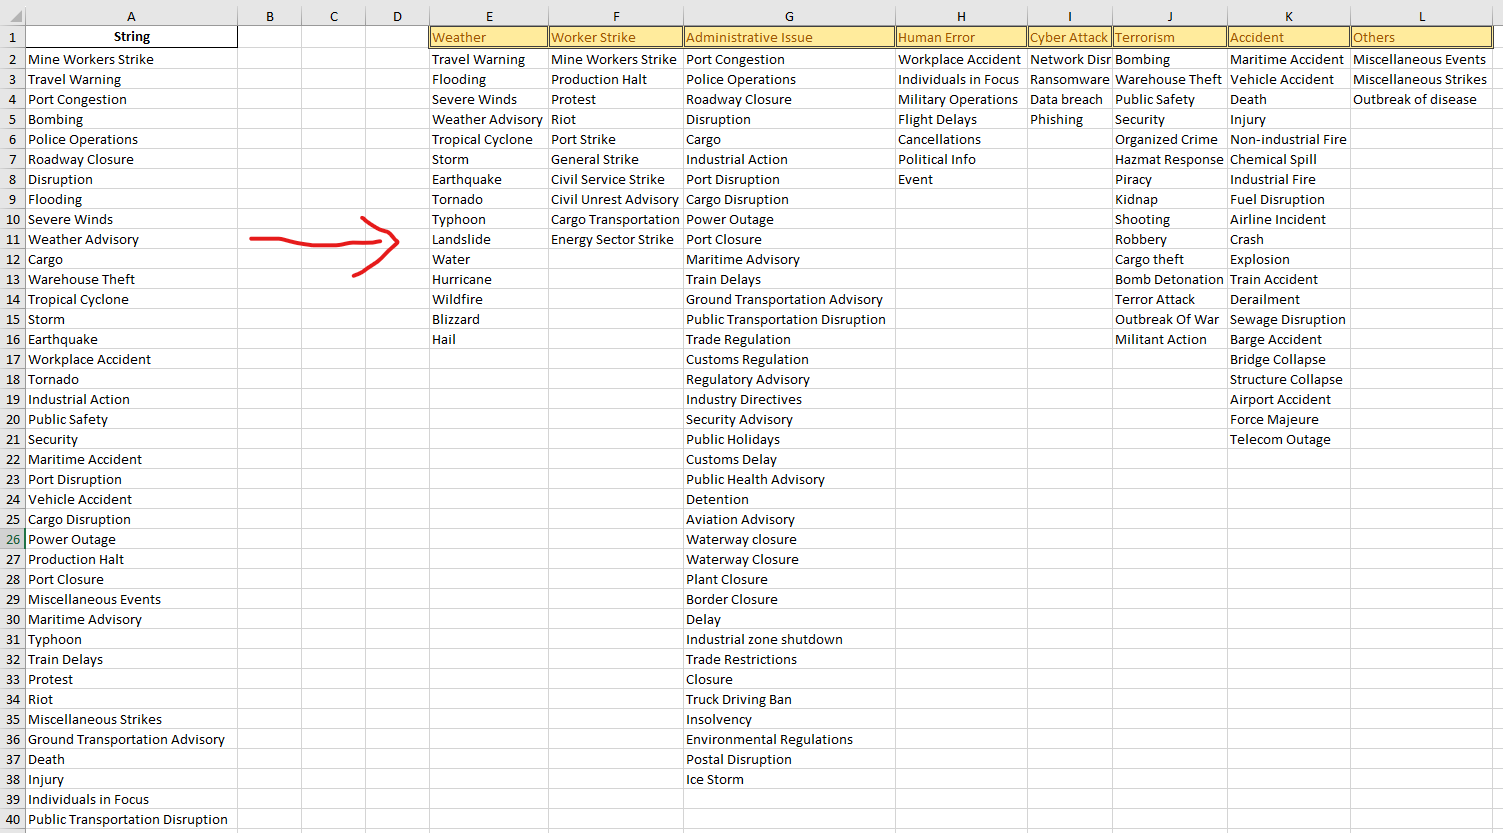

In [18]:
new_labels_df = pd.read_excel("data/new_labels.xlsx")
new_labels_df.head()

Weather        Worker Strike Administrative Issue  \
0          Flooding  Mine Workers Strike      Port Congestion   
1      Severe Winds      Production Halt    Police Operations   
2  Weather Advisory              Protest      Roadway Closure   
3  Tropical Cyclone                 Riot           Disruption   
4             Storm          Port Strike                Cargo   

            Human Error        Cyber Attack        Terrorism  \
0    Workplace Accident  Network Disruption          Bombing   
1  Individuals in Focus          Ransomware  Warehouse Theft   
2   Military Operations         Data breach    Public Safety   
3         Flight Delays            Phishing         Security   
4         Cancellations                 NaN  Organized Crime   

              Accident                 Others  
0    Maritime Accident   Miscellaneous Events  
1     Vehicle Accident  Miscellaneous Strikes  
2                Death    Outbreak of disease  
3               Injury                    NaN  
4  Non-industrial Fire                    NaN

#### convert them into lists

In [19]:
new_labels_dict = new_labels_df.to_dict(orient="list")


for key, value in new_labels_dict.items():
    new_labels_dict[key] = [item for item in value if not pd.isnull(item)]

for category in new_labels_dict:
    print("\n")
    print(category + "\n")
    print(new_labels_dict[category])



Weather

['Flooding', 'Severe Winds', 'Weather Advisory', 'Tropical Cyclone', 'Storm', 'Earthquake', 'Tornado', 'Typhoon', 'Landslide', 'Water', 'Hurricane', 'Wildfire', 'Blizzard', 'Hail']


Worker Strike

['Mine Workers Strike', 'Production Halt', 'Protest', 'Riot', 'Port Strike', 'General Strike', 'Civil Service Strike', 'Civil Unrest Advisory', 'Cargo Transportation Strike', 'Energy Sector Strike']


Administrative Issue

['Port Congestion', 'Police Operations', 'Roadway Closure', 'Disruption', 'Cargo', 'Industrial Action', 'Port Disruption', 'Cargo Disruption', 'Power Outage', 'Port Closure', 'Maritime Advisory', 'Train Delays', 'Ground Transportation Advisory', 'Public Transportation Disruption', 'Trade Regulation', 'Customs Regulation', 'Regulatory Advisory', 'Industry Directives', 'Security Advisory', 'Public Holidays', 'Customs Delay', 'Public Health Advisory', 'Detention', 'Aviation Advisory', 'Waterway closure', 'Waterway Closure', 'Plant Closure', 'Border Closure', 'Delay

### create a new column with the summarized label

In [20]:
result_df["Summarized_label"] = None

for index, row in result_df.iterrows():
    value = row["Category_single"]
    for key, values in new_labels_dict.items():
        if value in values:
            result_df.at[index, "Summarized_label"] = key
            break  # No need to check other keys if match found
result_df

Details  \
0     Media sources indicate that workers at the Gra...   
1     News sources are stating that recent typhoons ...   
2     The persisting port congestion at Shanghai’s Y...   
3     Updated local media sources from Jakarta indic...   
4     According to local police in Jakarta, two expl...   
...                                                 ...   
5777  Intelligence received by Everstream Analytics ...   
5778  Meteorological sources indicate that a series ...   
5779  Industry sources report on December 7 that Svi...   
5780  Industry sources indicate on December 14 that ...   
5781  On November 17, Dutch media sources reported t...   

                                               Category  \
0                                   Mine Workers Strike   
1                                        Travel Warning   
2                                       Port Congestion   
3                            Bombing, Police Operations   
4                            Bombing, Police Operations   
...                                                 ...   
5777                                          Ice Storm   
5778  Roadway Closure / Disruption, Ground Transport...   
5779                                  Industrial Action   
5780                                        Port Strike   
5781                                        Port Strike   

                                        Details_cleaned  \
0     medium source indicate worker grasberg mine ex...   
1     news source stating recent typhoon impact hong...   
2     persisting port congestion shanghai ’ yangshan...   
3     updated local medium source jakarta indicate e...   
4     according local police jakarta two explosion c...   
...                                                 ...   
5777  intelligence received everstream analytics ind...   
5778  meteorological source indicate series winter s...   
5779  industry source report december 7 svitzer aust...   
5780  industry source indicate december 14 worker dp...   
5781  november 17 dutch medium source reported worke...   

                                       Category_cleaned      Category_single  \
0                                   Mine Workers Strike  Mine Workers Strike   
1                                        Travel Warning       Travel Warning   
2                                       Port Congestion      Port Congestion   
3                            Bombing, Police Operations              Bombing   
4                            Bombing, Police Operations              Bombing   
...                                                 ...                  ...   
5777                                          Ice Storm            Ice Storm   
5778  Roadway Closure / Disruption, Ground Transport...      Roadway Closure   
5779                                  Industrial Action    Industrial Action   
5780                                        Port Strike          Port Strike   
5781                                        Port Strike          Port Strike   

          Summarized_label  
0            Worker Strike  
1     Administrative Issue  
2     Administrative Issue  
3                Terrorism  
4                Terrorism  
...                    ...  
5777  Administrative Issue  
5778  Administrative Issue  
5779  Administrative Issue  
5780         Worker Strike  
5781         Worker Strike  

[5780 rows x 6 columns]

## Naive Bayes Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [22]:
X = result_df["Details_cleaned"]
y = result_df["Summarized_label"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
# vectorizer = CountVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [25]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

In [26]:
predictions = naive_bayes.predict(X_test_tfidf)

In [27]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Naive Bayes model:", accuracy)
print(classification_report(y_test, predictions))

Accuracy of Naive Bayes model: 0.763840830449827
                      precision    recall  f1-score   support

            Accident       0.71      0.74      0.72       129
Administrative Issue       0.83      0.89      0.86       662
        Cyber Attack       0.00      0.00      0.00         4
         Human Error       0.00      0.00      0.00        18
              Others       0.41      0.24      0.30        79
           Terrorism       0.42      0.15      0.23        52
             Weather       0.77      0.92      0.84        92
       Worker Strike       0.61      0.69      0.65       120

            accuracy                           0.76      1156
           macro avg       0.47      0.46      0.45      1156
        weighted avg       0.73      0.76      0.74      1156



/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Find the optimal Alpha parameter

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": [0.1, 0.5, 1.0, 2.0]}

# Initialize the grid search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring="accuracy")

# Perform the grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_["alpha"]
print("Best Alpha:", best_alpha)

# Train the model with the best alpha
naive_bayes_tuned = MultinomialNB(alpha=best_alpha)
naive_bayes_tuned.fit(X_train_tfidf, y_train)

Best Alpha: 0.1


MultinomialNB(alpha=0.1)

Change the Alpha to 0.1 and max_features to 4000 for better performance

In [29]:
import time

In [30]:
X = result_df["Details_cleaned"]
y = result_df["Summarized_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

start_time = time.time()
tfidf_vectorizer = TfidfVectorizer(max_features=4000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

naive_bayes = MultinomialNB(alpha=0.1)
naive_bayes.fit(X_train_tfidf, y_train)

predictions = naive_bayes.predict(X_test_tfidf)

end_time = time.time()
total_runtime = end_time - start_time

accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Naive Bayes model:", accuracy)
print(classification_report(y_test, predictions))

print("Total Runtime:", total_runtime)

Accuracy of Naive Bayes model: 0.7923875432525952
                      precision    recall  f1-score   support

            Accident       0.74      0.84      0.79       129
Administrative Issue       0.89      0.87      0.88       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.67      0.22      0.33        18
              Others       0.45      0.35      0.40        79
           Terrorism       0.54      0.40      0.46        52
             Weather       0.77      0.93      0.85        92
       Worker Strike       0.65      0.75      0.69       120

            accuracy                           0.79      1156
           macro avg       0.71      0.58      0.60      1156
        weighted avg       0.79      0.79      0.79      1156

Total Runtime: 0.11717486381530762


## Logistic Regression model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [34]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression Model: 0.7975778546712803
                      precision    recall  f1-score   support

            Accident       0.79      0.81      0.80       129
Administrative Issue       0.83      0.93      0.88       662
        Cyber Attack       0.00      0.00      0.00         4
         Human Error       0.00      0.00      0.00        18
              Others       0.64      0.34      0.45        79
           Terrorism       0.46      0.21      0.29        52
             Weather       0.83      0.87      0.85        92
       Worker Strike       0.69      0.71      0.70       120

            accuracy                           0.80      1156
           macro avg       0.53      0.48      0.50      1156
        weighted avg       0.77      0.80      0.78      1156



/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [36]:
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

param_grid = {
    "tfidf__max_features": [500, 1000, 2000, 3000, 4000],
    "model__C": [0.1, 1.0, 10.0],
}

pipeline = Pipeline([("tfidf", TfidfVectorizer()), ("model", LogisticRegression())])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Tuned Logistic Regression Model:", accuracy)
print(classification_report(y_test, y_pred))

/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

Best Parameters: {'model__C': 10.0, 'tfidf__max_features': 2000}
Accuracy of Tuned Logistic Regression Model: 0.8200692041522492
                      precision    recall  f1-score   support

            Accident       0.81      0.86      0.83       129
Administrative Issue       0.86      0.91      0.88       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.60      0.17      0.26        18
              Others       0.61      0.43      0.50        79
           Terrorism       0.61      0.44      0.51        52
             Weather       0.87      0.90      0.89        92
       Worker Strike       0.73      0.75      0.74       120

            accuracy                           0.82      1156
           macro avg       0.76      0.59      0.63      1156
        weighted avg       0.81      0.82      0.81      1156



The best parameters are 'model__C': 10.0, 'tfidf__max_features': 2000

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

start_time = time.time()
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = LogisticRegression(C=10.0)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

end_time = time.time()
total_runtime = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)
print(classification_report(y_test, y_pred))

print("Total Runtime:", total_runtime)

Accuracy of Logistic Regression Model: 0.8200692041522492
                      precision    recall  f1-score   support

            Accident       0.81      0.86      0.83       129
Administrative Issue       0.86      0.91      0.88       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.60      0.17      0.26        18
              Others       0.61      0.43      0.50        79
           Terrorism       0.61      0.44      0.51        52
             Weather       0.87      0.90      0.89        92
       Worker Strike       0.73      0.75      0.74       120

            accuracy                           0.82      1156
           macro avg       0.76      0.59      0.63      1156
        weighted avg       0.81      0.82      0.81      1156

Total Runtime: 0.3288562297821045


## Support Vector Machine (SVM) model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [41]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [42]:
y_pred = svm_model.predict(X_test_tfidf)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of SVM model: 0.8183391003460208
                      precision    recall  f1-score   support

            Accident       0.78      0.82      0.80       129
Administrative Issue       0.87      0.92      0.89       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.67      0.11      0.19        18
              Others       0.62      0.42      0.50        79
           Terrorism       0.55      0.31      0.40        52
             Weather       0.82      0.90      0.86        92
       Worker Strike       0.72      0.80      0.76       120

            accuracy                           0.82      1156
           macro avg       0.75      0.57      0.60      1156
        weighted avg       0.81      0.82      0.80      1156



In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [0.1, 1, 10]}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_tfidf, y_train)
best_c = grid_search.best_params_["C"]
print("Best C:", best_c)

Best C: 10


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

svm_model = SVC(kernel="linear", C=10)
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of SVM model: 0.782871972318339
                      precision    recall  f1-score   support

            Accident       0.72      0.84      0.77       129
Administrative Issue       0.86      0.86      0.86       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.62      0.28      0.38        18
              Others       0.51      0.46      0.48        79
           Terrorism       0.49      0.38      0.43        52
             Weather       0.81      0.87      0.84        92
       Worker Strike       0.69      0.69      0.69       120

            accuracy                           0.78      1156
           macro avg       0.71      0.58      0.61      1156
        weighted avg       0.78      0.78      0.78      1156



But when C is set to 10, the accuracy drops, it may be due to overfitting. We will still use the defaul value C=1.0

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

start_time = time.time()
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

svm_model = SVC(kernel="linear")
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

end_time = time.time()
total_runtime = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)
print(classification_report(y_test, y_pred))

print("Total Runtime:", total_runtime)

Accuracy of SVM model: 0.8217993079584776
                      precision    recall  f1-score   support

            Accident       0.82      0.86      0.84       129
Administrative Issue       0.86      0.93      0.89       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.00      0.00      0.00        18
              Others       0.64      0.41      0.50        79
           Terrorism       0.61      0.33      0.42        52
             Weather       0.83      0.90      0.86        92
       Worker Strike       0.71      0.77      0.74       120

            accuracy                           0.82      1156
           macro avg       0.68      0.55      0.58      1156
        weighted avg       0.80      0.82      0.81      1156

Total Runtime: 3.1480040550231934


## Random Forest Model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [50]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = rf_model.predict(X_test_tfidf)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of Random Forest Model: 0.801038062283737
                      precision    recall  f1-score   support

            Accident       0.77      0.80      0.79       129
Administrative Issue       0.84      0.92      0.88       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.50      0.06      0.10        18
              Others       0.72      0.39      0.51        79
           Terrorism       0.67      0.19      0.30        52
             Weather       0.79      0.86      0.82        92
       Worker Strike       0.66      0.77      0.71       120

            accuracy                           0.80      1156
           macro avg       0.74      0.53      0.56      1156
        weighted avg       0.79      0.80      0.78      1156



Fine tuning by adjusting the hyperparamters. After testing on the hyperparameters, below are the best parameters for this model.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

start_time = time.time()
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

rf_model = RandomForestClassifier(
    n_estimators=300, min_samples_split=5, random_state=42
)
rf_model.fit(X_train_tfidf, y_train)

y_pred = rf_model.predict(X_test_tfidf)
end_time = time.time()
total_runtime = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Model:", accuracy)
print(classification_report(y_test, y_pred))

print("Total Runtime:", total_runtime)

Accuracy of Random Forest Model: 0.8070934256055363
                      precision    recall  f1-score   support

            Accident       0.80      0.79      0.80       129
Administrative Issue       0.83      0.94      0.88       662
        Cyber Attack       1.00      0.25      0.40         4
         Human Error       0.50      0.06      0.10        18
              Others       0.74      0.41      0.52        79
           Terrorism       0.86      0.12      0.20        52
             Weather       0.82      0.85      0.83        92
       Worker Strike       0.67      0.78      0.72       120

            accuracy                           0.81      1156
           macro avg       0.78      0.52      0.56      1156
        weighted avg       0.80      0.81      0.78      1156

Total Runtime: 2.4808011054992676


### KNN

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [55]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [57]:
# Step 4: Apply KNN Algorithm
k = 5  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate Performance
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7889273356401384


Plot the model's performance against values of k to find the optimal k

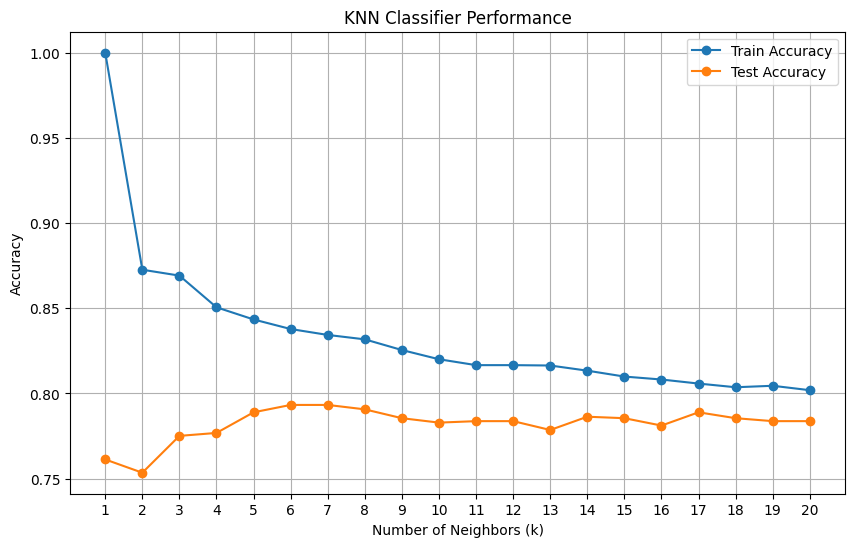

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k_values = range(1, 21)

train_scores = []
test_scores = []

# Iterate over each k value
for k in k_values:
    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calculate training and testing accuracy
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the performance scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label="Train Accuracy", marker="o")
plt.plot(k_values, test_scores, label="Test Accuracy", marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Classifier Performance")
plt.xticks(np.arange(1, 21, step=1))
plt.legend()
plt.grid(True)
plt.show()

k=5 is an optimal value

Find other optimal hyperparameters by using grid search

In [59]:
knn = KNeighborsClassifier()

param_grid = {"weights": ["uniform", "distance"], "p": [1, 2]}

grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy"
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

test_accuracy = best_model.score(X_test, y_test)
print("Best Parameters:", best_params)
print("Test Accuracy:", test_accuracy)

/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^

Best Parameters: {'p': 2, 'weights': 'distance'}
Test Accuracy: 0.7993079584775087


/Users/inflaton/anaconda3/envs/maritime/lib/python3.12/site-packages/sklearn/model_selection/_search.py:1052: UserWarning: One or more of the test scores are non-finite: [       nan 0.58348075 0.77465707 0.78136118]
  warnings.warn(


Lastly, run the model with optimal hyperparameters

In [60]:
import time

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

start_time = time.time()

k = 5
knn_model = KNeighborsClassifier(n_neighbors=k, weights="distance")
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

end_time = time.time()
total_runtime = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Total Runtime:", total_runtime)

Accuracy: 0.7993079584775087
Total Runtime: 0.10337376594543457
